### Problemas de valores inicias (cap. 7)

---

1. [Exercício 1](#Exercício-1:)
2. [Método de Euler](#Fórmula-de-Taylor)
    * [Exercício 2](#Exercício-2:)
    * [Exercício 3](#Exercício-3:)
    * [Exercício 4](#Exercício-4:)
    * [Exercício 5](#Exercício-5:)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)

Populating the interactive namespace from numpy and matplotlib


#### Exercício 1:

Determine a solução exata dos problemas de valor inicial

a) 𝑦′ = 𝑦, 𝑦(0) = 1, 𝑡 ∈ [0,1]

b) 𝑦′ = $\frac{t+y}{t}$, 𝑦(0) = 1, 𝑡 ∈ [0,10]

**R:**
    
(a) $dy/dt = y \rightarrow \frac{1}{y} dy = dt \rightarrow ln|y| = t + c$.
 
 Logo, temos que $y(t) = y_{0}e^t$, e como $y(0) = 1 \rightarrow y(t) = e^t$
 
(b)  $y' = \frac{t}{t+y} \rightarrow (t+y)y' - t = 0 $.

Tentei utilizando o [método do fator integrante](https://pt.wikipedia.org/wiki/Fator_integrante): 

$\begin{cases} M(t, y) = -t \\ N(t, y) = (t+y) \end{cases} \rightarrow 
\begin{cases} M_{y} = \frac{\partial M(t, y)}{\partial y} = 0 \\ N_{t} = \frac{\partial N(t, y)}{\partial t} = 1 \end{cases} \rightarrow \int\frac{M_{y} - N_{t}}{M}dt = \int{\frac{1}{t}}dt = ln(t)\rightarrow \mu(t, y) = e^{\int\frac{M_{y} - N_{t}}{M}dt} = e^{ln(t)} = t$

Logo, multiplicando a equação por $\mu(t,y)$:

$t(t+y)y' - t^2 = 0$

Aqui, não consegui resolver direto a equação.. [Vi no Wolfram Alpha que a solução não é exata...](http://m.wolframalpha.com/input/?i=y%27+%3D+t%2F%28t%2By%29)

### [Método de Euler](https://pt.wikipedia.org/wiki/M%C3%A9todo_de_Euler)

Utilizamos na solução de equações diferenciais ordinárias, é um método de integração numérica de problemas de valor inicial do tipo:

$\begin{cases} y′ = f(y,t) \\ y(t_{0}) = y_0 \end{cases}$

Pela expansão de Taylor, temos: 

$y'(t) = \frac{y(t+h) - y(t)}{h} + O(h^2) \rightarrow y(t+h) = y(t) + y'(t)h + O(h^2)$

A aproximação da função é dada da seguinte forma:

$\begin{cases} Y(t+h) = Y(t) + f(Y(t), t)h \\ f(Y(t), t) = y' \end{cases}$

O passo $h$ pode ser escolhido arbitrariamente, uma boa forma, dado um intervalo de $h's$, é escolher o que tem menor erro quadrado nos pontos conhecidos.

*OBS: No exercício 1(a), tínhamos $f(Y(t), t) = y$*

#### Exercício 2:

Faça um programa que calcula a solução numérica de problemas de valor inicial

$\begin{cases} y′ = f(y,t) \\ y(t_{0}) = y_0 \end{cases}$

pelo método de Euler de primeira ordem. A função deve ser da forma 𝑡 = 𝐸𝑢𝑙𝑒𝑟(𝑓, 𝑣𝑡, 𝑦0), onde
𝑓 e 𝑦0 são a função e o valor inicial do problema e 𝑣𝑡 é um vetor que contém os valores da
variável 𝑡 onde a função 𝑦 deve ser estimada (𝑣𝑡 = [𝑡0,𝑡1, … ,𝑡𝑛])

In [19]:
def euler_1a_ordem(f, vt, y0):
    
    """
    Resolve o problema de valor inicial com o método de Euler de 1ª ordem, com h= x_n - x_(n-1).
    
    :param f: função lambda(t,y) de y' do problema
    :param vt: vetor que contém os valores da variável
    :param y0: valor inicial do problema
    
    :returns: estimação de y nos valores em vt
    """
    
        
    y_ant = y0
    t_ant = vt[0]
    
    est = [y0]
    
    for i in vt[1:]:
        
        t = i
        h = t - t_ant
        
        # passo de Taylor
        y = y_ant + f(y_ant, t_ant)*h
        est.append(y)
        
        # atualização dos termos
        y_ant = y
        t_ant = t
    
    return est

#### Exercício 3:

Faça gráficos que contenham a solução exata do problema 1a) e 1b) e as solução numéricas
obtidas com o programa desenvolvido em 2) para 𝑡 amostrado uniformemente no intervalo [0,1]
com 5 valores e com 10 valores.

In [29]:
vt5 = np.linspace(0,1,5)
vt10 = np.linspace(0,1,10)

(a)

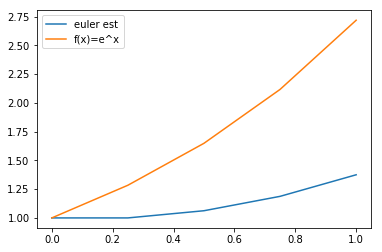

[1, 1.0, 1.0625, 1.1875, 1.375]

In [31]:
f = lambda t, y: y
y0 = 1

est = euler_1a_ordem(f, vt5, y0)

plt.plot(vt5, est, label='euler est')

# Solução analítica: f(x) = e^x
f1 = lambda t: np.exp(t)
y1 = [f1(x) for x in vt5]

plt.plot(vt5, y1, label='f(x)=e^x')
plt.legend()
plt.show()

est

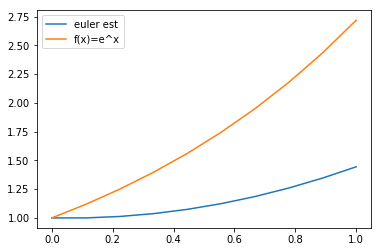

[1,
 1.0,
 1.0123456790123457,
 1.0370370370370372,
 1.0740740740740742,
 1.123456790123457,
 1.1851851851851853,
 1.2592592592592593,
 1.345679012345679,
 1.4444444444444444]

In [32]:
est = euler_1a_ordem(f, vt10, y0)

plt.plot(vt10, est, label='euler est')

# Solução analítica: f(x) = e^x
f1 = lambda t: np.exp(t)
y1 = [f1(x) for x in vt10]

plt.plot(vt10, y1, label='f(x)=e^x')
plt.legend()
plt.show()

est

(b)

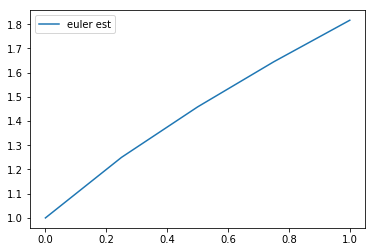

[1, 1.25, 1.4583333333333333, 1.6445035460992907, 1.8161992143703014]

In [55]:
f = lambda t, y: t/(t+y)
y0 = 1

est = euler_1a_ordem(f, vt5, y0)

plt.plot(vt5, est, label='euler est')
plt.legend()
plt.show()

est

# Não obtive solução analítica...

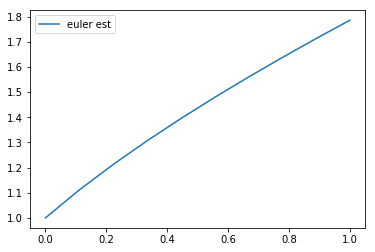

[1,
 1.1111111111111112,
 1.2121212121212122,
 1.3060179257362357,
 1.3945365406802606,
 1.4787943474620537,
 1.559562401574875,
 1.6374001738679893,
 1.7127293447591134,
 1.7858773793429372]

In [56]:
est = euler_1a_ordem(f, vt10, y0)

plt.plot(vt10, est, label='euler est')
plt.legend()
plt.show()

est

# Não obtive solução analítica...

#### Exercício 4:

Faça um programa que calcula a solução numérica de problemas de valor inicial:

$\begin{cases} y′ = f(y,t) \\ y(t_{0}) = y_0 \end{cases}$

pelo método de Euler com ordem especificada. A função deve ser da forma 𝑡 =
𝐸𝑢𝑙𝑒𝑟(𝑓, 𝑣𝑡, 𝑦0, 𝑜𝑟𝑑𝑒𝑚), onde 𝑓 e 𝑦0 são a função e o valor inicial do problema e 𝑣𝑡 é um vetor
que contém os valores da variável 𝑡 onde a função 𝑦 deve ser estimada (𝑣𝑡 = [𝑡0,𝑡1, … ,𝑡𝑛]) e
𝑜𝑟𝑑𝑒𝑚, é claro, é a ordem do método. Caso o sistema de computação científica que você esteja
trabalhando não permita manipulação simbólica, faça programas específicos para soluções
numéricas de (1a) e de (1b) de segunda ordem.


**R:** O método de Euler é um método de 1ª ordem, mais que faz parte de uma famílai de [métodos de Runge–Kuttauma](https://pt.wikipedia.org/wiki/Lista_de_m%C3%A9todos_Runge-Kutta). 

$\begin{cases} y_{n+1}=y_{n}+h\sum _{i=1}^{s}b_{i}k_{i} \\ k_{i}=f\left(t_{n}+c_{i}h,y_{n}+h\sum _{j=1}^{s}a_{ij}k_{j}\right) \end{cases}$

Os índices $a_{ij}$ são obtidos pela matriz de Butcher com os valores $b_{i}, c_{i}$. 

Não achei uma implementação generalizada, e oarece muito obscura a obtenção dos valores $b_{i}, c_{i}$. [O método mais comentado é o de 4ª ordem, que é implementado abaixo, com h=1.](https://pt.wikipedia.org/wiki/M%C3%A9todo_de_Runge-Kutta#O_m%C3%A9todo_Runge%E2%80%93Kutta_cl%C3%A1ssico_de_quarta_ordem)

In [51]:
def runge_kuttama_4a_ordem(f, vt, y0):
        
    y_ant = y0
    t_ant = vt[0]
    
    est = [y0]
    
    for i in vt[1:]:
        
        t = i
        h = t - t_ant
        
        # aproximação por RK4
        k1 = f(t_ant, y_ant)
        k2 = f(t_ant + h/2, y_ant + k1*h/2)
        k3 = f(t_ant + h/2, y_ant + k2*h/2)
        k4 = f(t_ant + h, y_ant + k3*h)
        
        y = y_ant + (k1 + 2*k2 + 2*k3 + k4)*h/6
        est.append(y)
        
        # atualização dos termos
        y_ant = y
        t_ant = t
    
    return est

#### Exercício 5:

Faça gráficos que contenham a solução exata do problema 1a) e 1b) e as solução numéricas
obtidas com o programa desenvolvido em 4) para 𝑡 amostrado uniformemente no intervalo [0,1]
com 5 valores e com 10 valores.

(a)

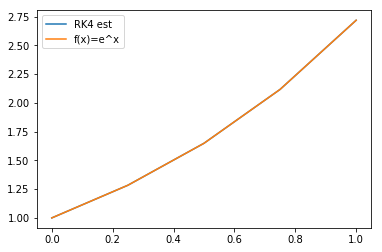

[1,
 1.2840169270833333,
 1.648699469036526,
 2.1169580259162033,
 2.718209939201323]

In [52]:
f = lambda t, y: y
y0 = 1

est = runge_kuttama_4a_ordem(f, vt5, y0)

plt.plot(vt5, est, label='RK4 est')

# Solução analítica: f(x) = e^x
f1 = lambda t: np.exp(t)
y1 = [f1(x) for x in vt5]

plt.plot(vt5, y1, label='f(x)=e^x')
plt.legend()
plt.show()

est

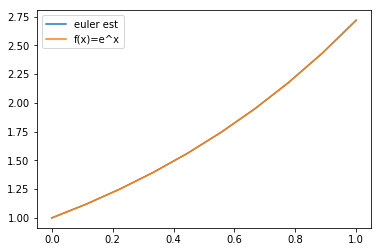

[1,
 1.1175189249606259,
 1.248848547645153,
 1.3956118864030505,
 1.5596226949554082,
 1.742907877410762,
 1.9477325374694812,
 2.1766279713837267,
 2.43242295061997,
 2.718278680826383]

In [53]:
est = runge_kuttama_4a_ordem(f, vt10, y0)

plt.plot(vt10, est, label='euler est')

# Solução analítica: f(x) = e^x
f1 = lambda t: np.exp(t)
y1 = [f1(x) for x in vt10]

plt.plot(vt10, y1, label='f(x)=e^x')
plt.legend()
plt.show()

est

(b)

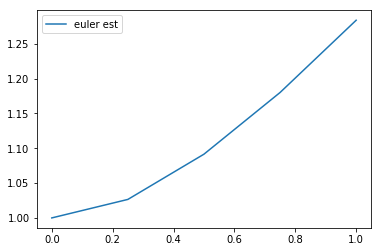

[1,
 1.026559936442642,
 1.0915063166287882,
 1.1800263209794746,
 1.2837312062175765]

In [59]:
f = lambda t, y: t/(t+y)
y0 = 1

est = runge_kuttama_4a_ordem(f, vt5, y0)

plt.plot(vt5, est, label='euler est')
plt.legend()
plt.show()

est

# Não obtive solução analítica...

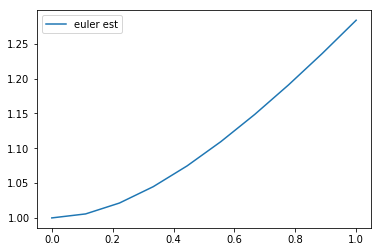

[1,
 1.0057354335578408,
 1.0213572441737022,
 1.044852286018692,
 1.0746442386303179,
 1.109512688524608,
 1.1485137283417859,
 1.1909138516914073,
 1.23613859960053,
 1.2837338847750748]

In [60]:
est = runge_kuttama_4a_ordem(f, vt10, y0)

plt.plot(vt10, est, label='euler est')
plt.legend()
plt.show()

est

# Não obtive solução analítica...